In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string

In [192]:
df = pd.read_csv("Tweets.csv")


In [193]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [194]:
df.shape

(27481, 4)

In [195]:
# df.drop(columns = ['no','topic'],inplace=True)

In [196]:
df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [197]:
df.dropna(inplace=True,axis=0)

In [198]:
df.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [199]:
df.shape

(27480, 4)

In [200]:
df.duplicated().sum()

0

In [201]:
df.drop_duplicates(keep='first',inplace=True)

In [202]:
df = df[['text','sentiment']]

In [203]:
df.rename(columns={'sentiment':'label'},inplace=True)

In [204]:
df.head()

,text,label
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [205]:
df['label'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [206]:
df['label'] = df['label'].map({'positive':1,'negative':2,'neutral':3})

In [207]:
df['label'].unique()

array([3, 2, 1], dtype=int64)

In [208]:
df['label'].value_counts()

label
3    11117
1     8582
2     7781
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2ac61533d10>,
 [Text(0.32493445658875425, 1.0509127456270435, 'negative'),
  Text(-1.0209666170100276, -0.4094229682749858, 'positive'),
  Text(0.6927409532782282, -0.85446472814925, 'neutral')],
 [Text(0.17723697632113866, 0.5732251339783874, '40.45'),
  Text(-0.5568908820054694, -0.22332161905908315, '31.23'),
  Text(0.3778587017881244, -0.46607166989959087, '28.32')])

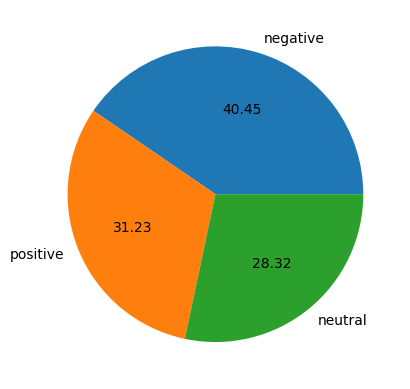

In [210]:
plt.pie(df['label'].value_counts(),labels=['negative','positive','neutral'],autopct="%0.2f")

In [211]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SVI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [212]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [213]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [214]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [215]:
def preprocessing(text):
    preprocessed_text = ""
    sentences = nltk.sent_tokenize(text)
    for i in range(len(sentences)):
        sentences[i] = sentences[i].lower()
        words = nltk.word_tokenize(sentences[i])
        words = [word for word in words if word not in set(stopwords.words('english'))]
        # Remove punctuation and special characters
        words = [word.translate(str.maketrans('', '', string.punctuation)) for word in words]
        words = [word for word in words if word.isalnum()]  # Remove non-alphanumeric characters
        words = [lemmatizer.lemmatize(word, pos='v') for word in words]
        words = [stemming.stem(word) for word in words]
        preprocessed_text += " ".join(words) + " " 
    return preprocessed_text.strip()


In [216]:
df['text'] = df['text'].apply(preprocessing)

In [217]:
df.head()

,text,label
0,respond go,3
1,sooo sad miss san diego,2
2,boss bulli,2
3,interview leav alon,2
4,son put releas alreadi buy,2


In [218]:
X = df['text']
y = df['label']

In [219]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [220]:
X = cv.fit_transform(X).toarray()

In [221]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [222]:
X_train.shape

(21984, 21603)

In [223]:
X_test.shape

(5496, 21603)

In [224]:
y_train.shape

(21984,)

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

c:\Users\SVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [226]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6937772925764192
[[1227   70  447]
 [ 104  973  488]
 [ 282  292 1613]]


In [227]:
import pickle
pickle.dump(cv,open('vector.pkl','wb'))
pickle.dump(preprocessing,open('preprocessing_func.pkl','wb'))
pickle.dump(lr,open('model.pkl','wb'))

In [228]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

In [229]:
bnb = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()

In [230]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
accuracy_score(y_test,y_pred2)